# _Python for Scientific Data Analysis_

## Homework - Week 10 (Due Nov 1)



### 1. Simple Matplotlib Plotting

* read in ``file.txt``
* use SciPy's ``curve_fit`` function
* plot the best-fit function as an orange dash-dotted line
* overplot the original data with green cross symbols
* Label ``X`` and ``Y`` in size 14 font.


[2.97072687e-15 9.99999996e-01 6.28164440e+01]


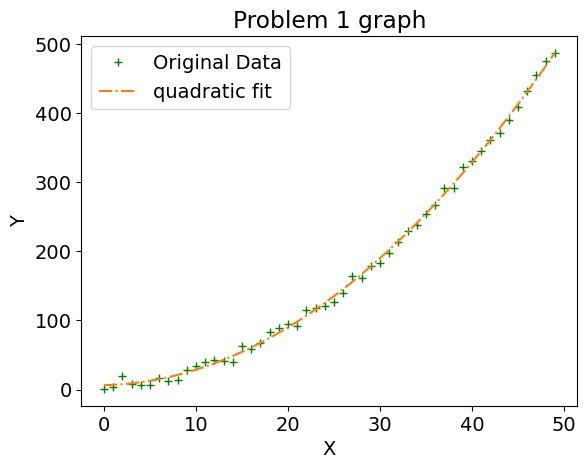

In [84]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14.0
from scipy.optimize import curve_fit

x,y = np.loadtxt('file.txt', unpack=True)

# popt, pcov = curve_fit(lambda x1, a, b: a * x1 + b, 
#                        x, y)

popt2, pcov2 = curve_fit(lambda x1, a, b, c: a*x1**2 + b*x1 + c,
                         x, y)

fig, ax = plt.subplots()
ax.plot(x,y, 'g+', label='Original Data')
# ax.plot(x, x*popt[0] + popt[1], label='linear fit')
ax.plot(x, popt2[0]*x**2 + popt2[1]*x + popt2[2], c='tab:orange', ls='-.', label='quadratic fit')
ax.set_title('Problem 1 graph')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()


### 2. Customized Matplotlib Plotting

* read in ``compilation.txt`` 
* reproduce the following plot





* note: the array slicing is a little bit tricky (ideally you want a vectorized string operation with wildcards).  Here's a simple version:

```
lowg=np.where( ( flag == 'lowg') | (flag == 'young') | (flag == 'lowg,young') | (flag == 'ABDor,lowg,young')
              | (flag == 'Argus,lowg,young') | (flag == 'Columba,lowg,young') | (flag == 'TWA,lowg,young')
              | (flag == 'ScoCen,young')                                 
              | (flag == 'TucHor,young') | (flag=='Tuc-Hor,lowg,young') | (flag == 'plx-discrep,lowg') )
```

* note: the problem will require you to inspect the file to see the column headers.

* note: to convert from apparent to absolute magnitude ...
 $abs_{\rm mag}$ = $app_{\rm mag}$-5*log$_{\rm 10}$(distance/10 $pc$).    And the distance is related to the parallax as:
 $distance (pc) = 1 /parallax$. 
 
 i.e. To go from apparent magnitude to absolute magnitude (e.g. J to $M_{\rm J}$) do:
 
 $M_{\rm J}$ = J - 5*np.log10(1e2/parallax)
 
 **Hint** -  The column notation is tricky.  The columns for J, error in J, H, and error in H are:
 
 * J = column 27
 * eJ = column 28
 * H = column 30
 * eH = column 31

 ![](./cmd.png)


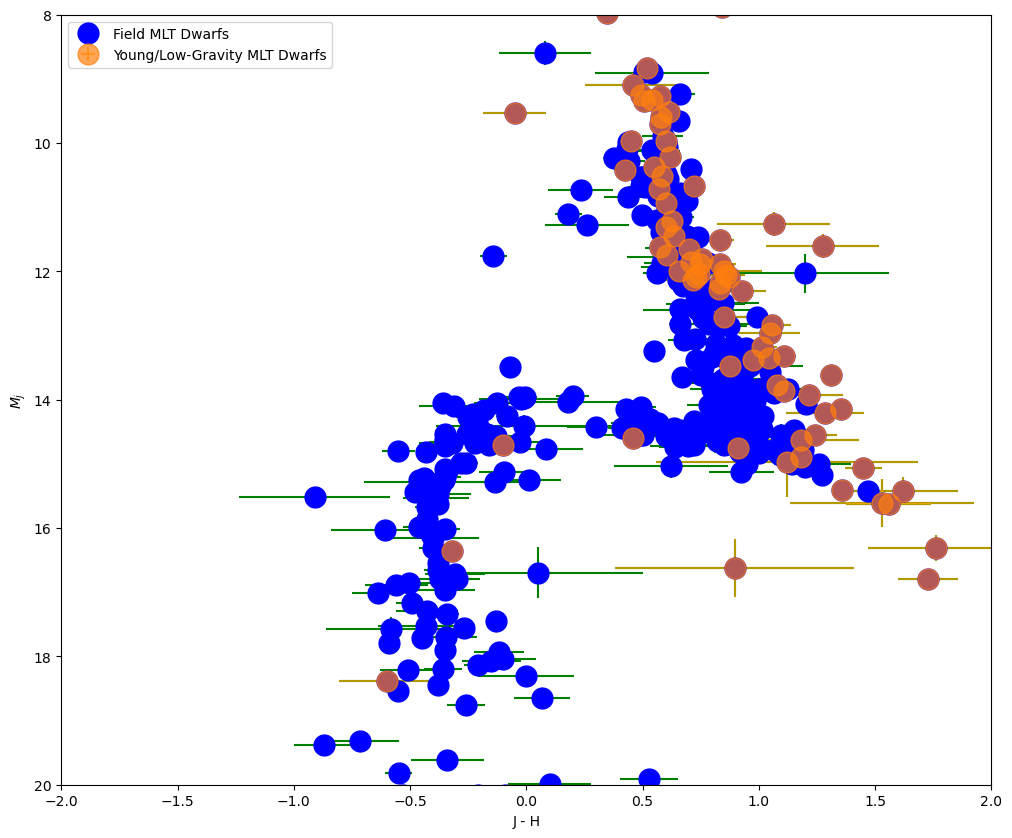

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [12,10]
from matplotlib.ticker import AutoMinorLocator

def mag_conversion(a, plx):
    m = a - 5*np.log10(1e2/plx)
    return m

comp = np.loadtxt('compilation.txt', dtype='str')

flag = comp[:,4]

lowg=comp[np.where( ( flag == 'lowg') | (flag == 'young') | (flag == 'lowg,young') | (flag == 'ABDor,lowg,young')
              | (flag == 'Argus,lowg,young') | (flag == 'Columba,lowg,young') | (flag == 'TWA,lowg,young')
              | (flag == 'ScoCen,young')                                 
              | (flag == 'TucHor,young') | (flag=='Tuc-Hor,lowg,young') | (flag == 'plx-discrep,lowg') )]


lowg_j = lowg[:,27].astype(float)
lowg_h = lowg[:,30].astype(float)
lowg_ej = lowg[:,28].astype(float)
lowg_eh = lowg[:,31].astype(float)
lowg_plx = lowg[:,8].astype(float)
lowg_eplx = lowg[:,9].astype(float)
lowg_mj = mag_conversion(lowg_j, lowg_plx)
lowg_emj = mag_conversion(lowg_ej, lowg_plx)


comp_j = comp[:,27].astype(float)
comp_h = comp[:,30].astype(float)
comp_ej = comp[:,28].astype(float)
comp_eh = comp[:,31].astype(float)
comp_plx = comp[:,8].astype(float)
comp_eplx = comp[:,9].astype(float)
comp_mj = mag_conversion(comp_j, comp_plx)
comp_emj = mag_conversion(comp_ej, comp_plx)

x = lowg_j - lowg_h
ex = np.sqrt(lowg_ej**2 + lowg_eh**2)


x1 = comp_j - comp_h
ex1 = np.sqrt(comp_ej**2 + comp_eh**2)

fig, ax = plt.subplots()
ax.errorbar(x1, comp_mj, xerr=ex1, yerr=comp_ej, 
            color='blue', marker='o',linestyle='',ecolor='green',
            markersize=15, alpha=1.0,label='Field MLT Dwarfs')

ax.errorbar(x, lowg_mj, xerr=ex, yerr=lowg_ej, 
            color='tab:orange',marker='o',linestyle='',ecolor='orange',
            markersize=15, alpha=0.7,label='Young/Low-Gravity MLT Dwarfs')


ax.set_ylim(8,20)
ax.set_xlim(-2,2)
ax.invert_yaxis()
ax.set_xlabel('J - H')
ax.set_ylabel(r'$M_{j}$')
plt.legend()
plt.show()



### 3. Multi-Panel Plots

From the same data as above, produce the following plot (you will have to read in J, H, K and L photometry and errors).

**Hint** -  the convention for the columns is the same as in problem 5:

  (i.e. K and L are columns 33 and 36, respectively)

**EXTRA CREDIT (one point)** -- instead of individually indexing values for the plotted variables and labels, do this in a for-loop with the x,y data points and labels all saved to variables outside of the loop.

![](./prob4.png)


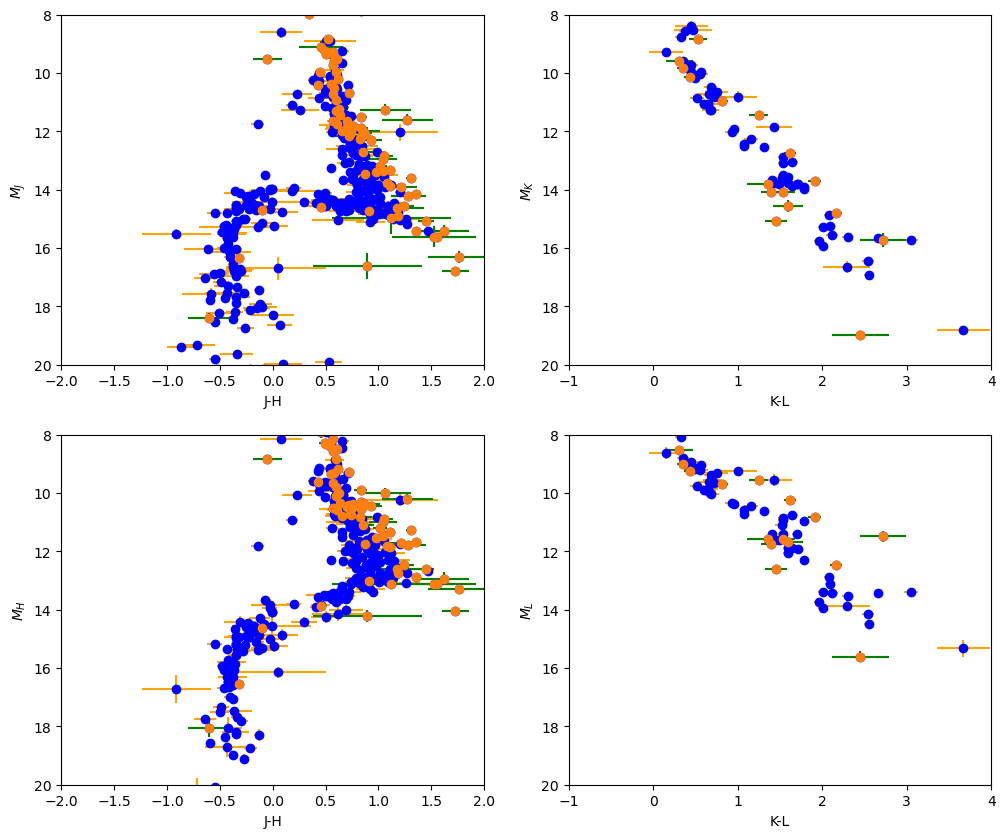

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [12,10]
from matplotlib.ticker import AutoMinorLocator

def mag_conversion(a, plx):
    m = a - 5*np.log10(1e2/plx)
    return m

comp = np.loadtxt('compilation.txt', dtype='str')

flag = comp[:,4]

lowg=comp[np.where( ( flag == 'lowg') | (flag == 'young') | (flag == 'lowg,young') | (flag == 'ABDor,lowg,young')
              | (flag == 'Argus,lowg,young') | (flag == 'Columba,lowg,young') | (flag == 'TWA,lowg,young')
              | (flag == 'ScoCen,young')                                 
              | (flag == 'TucHor,young') | (flag=='Tuc-Hor,lowg,young') | (flag == 'plx-discrep,lowg') )]


lowg_j = lowg[:,27].astype(float)      #low-g J-band 
lowg_h = lowg[:,30].astype(float)      #low-g H-band 
lowg_k = lowg[:,33].astype(float)      #low-g K-band
lowg_l = lowg[:,36].astype(float)      #low-g L-band
lowg_ej = lowg[:,28].astype(float)     #low-g J-band error 
lowg_eh = lowg[:,31].astype(float)     #low-g H-band error
lowg_ek = lowg[:,34].astype(float)     #low-g K-band error 
lowg_el = lowg[:,37].astype(float)     #low-g L-band error
lowg_plx = lowg[:,8].astype(float)     #low-g parallax  
lowg_mj = mag_conversion(lowg_j, lowg_plx)          #low-g abs magnitude J-band 
lowg_mh = mag_conversion(lowg_h, lowg_plx)          #low-g abs magnitude H-band 
lowg_mk = mag_conversion(lowg_k, lowg_plx)          #low-g abs magnitude K-band 
lowg_ml = mag_conversion(lowg_l, lowg_plx)          #low-g abs magnitude L-band 

all_lowg_mag = np.array((lowg_mj, lowg_mh, lowg_mk, lowg_ml))
all_lowg_err = np.array((lowg_ej, lowg_eh, lowg_ek, lowg_el))
lowg_xarr = np.array((lowg_j - lowg_h, lowg_k - lowg_l,lowg_j - lowg_h, lowg_k - lowg_l))
lowg_xerr = np.array((np.sqrt(lowg_ej**2 + lowg_eh**2), np.sqrt(lowg_ek**2 + lowg_el**2), 
                      np.sqrt(lowg_ej**2 + lowg_eh**2), np.sqrt(lowg_ek**2 + lowg_el**2)))


comp_j = comp[:,27].astype(float)      #total J-band
comp_h = comp[:,30].astype(float)      #total H-band
comp_k = comp[:,33].astype(float)      #total K-band
comp_l = comp[:,36].astype(float)      #total L-band
comp_ej = comp[:,28].astype(float)     #total J-band error
comp_eh = comp[:,31].astype(float)     #total H-band error
comp_ek = comp[:,34].astype(float)     #total K-band error
comp_el = comp[:,37].astype(float)     #total L-band error
comp_plx = comp[:,8].astype(float)     #total parallax
comp_mj = mag_conversion(comp_j, comp_plx)          #total abs magnitude J-band
comp_mh = mag_conversion(comp_h, comp_plx)          #total abs magnitude H-band
comp_mk = mag_conversion(comp_k, comp_plx)          #total abs magnitude K-band
comp_ml = mag_conversion(comp_l, comp_plx)          #total abs magnitude L-band

all_comp_mag = np.array((comp_mj, comp_mh, comp_mk, comp_ml))
all_comp_err = np.array((comp_ej, comp_eh, comp_ek, comp_el))
comp_xarr = np.array((comp_j - comp_h, comp_k - comp_l, comp_j - comp_h, comp_k - comp_l))
comp_xerr = np.array((np.sqrt(comp_ej**2 + comp_eh**2), np.sqrt(comp_ek**2 + comp_el**2),
                      np.sqrt(comp_ej**2 + comp_eh**2), np.sqrt(comp_ek**2 + comp_el**2)))

xlabs = ['J-H', 'K-L','J-H', 'K-L']
ylabs = [r'$M_{J}$', r'$M_{K}$', r'$M_{H}$', r'$M_{L}$']

fig, axes = plt.subplots(2,2)


for i, ax in enumerate(axes.flat):
    ax.errorbar(comp_xarr[i],all_comp_mag[i], xerr=comp_xerr[i], yerr=all_comp_err[i],
    color='blue',marker='o',linestyle='',ecolor='orange')
    ax.errorbar(lowg_xarr[i],all_lowg_mag[i], xerr=lowg_xerr[i], yerr=all_lowg_err[i],
    color='tab:orange',marker='o',linestyle='',ecolor='green')
    ax.set_xlabel(xlabs[i])
    ax.set_ylabel(ylabs[i])
    ax.set_ylim(8,20)
    ax.set_xlim(-2.5,2.5)
    ax.invert_yaxis()

for j, ax in enumerate([axes[0,1],axes[1,1]]):
    ax.set_xlim(-1,4)

### 4. Formatted Error Bar Plots

Start with the file ``test3.csv`` similar to (but not exactly the same as!) that from the Week 4 homework.  As a reminder, the first row in this table is a list of column headers.   

* Plot the radius (in Jupiter radii) vs semimajor axis for all planets detected by the transit method, including errors in the radius and and semimajor axis (examine the file headers to see which one to use).

* use a log scale for the y axis ``plt.yscale('log')``

Reproduce the output as follows:

![](./transit_plot.png)


### 5. Project Update

* Please give me a (**short**) update on the progress of your class project.  In particular, I would like to see ...

- A finalized short summary of what you are doing
- A list of code packages you plan to use or type of code you plan to write
- A description of the current status of your project
- Items where you are getting stuck (if any)/questions you may have
- Any plots or graphics you have produced.